# Recipe Recomendation Project

### Trabalho Final - TERA - Recomendação
Francisco Ottoni, Giovana Bandinelli, Madson Nascimento de Lima e Sonia Gondo

Fonte do banco de dados: https://www.kaggle.com/code/takuyaishii/recipe-preprocessing/data

Colunas da base:

RecipeId : Id da receita

Name : Nome da receita

CookTime : Tempo de cozimento

PrepTime : Tempo de preparo

TotalTime : Tempo total de preparo (Cozimento + Preparo)

Description : Descrição da receita

Images : link das imagens

RecipeCategory : Categoria da receita

Keywords : Palavras chaves da receita

RecipeIngredientQuantities: Quantidade de cada ingrediente

RecipeIngredientParts: Ingredientes

AggregatedRating: Média das avaliações da receita

Calories: Valor colórico da receita

RecipeServings: Quantidade de pessoas servidas

RecipeYield: Rendimento da receita

RecipeInstructions: Instruções da receita

reviews_in_dict: Avaliações da receita no formato de um dicionário

### Bibliotecas e Configurações

In [699]:
#import de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [700]:
#import From
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [701]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

### Leitura dos dados

In [702]:
df = pd.read_csv('recipe_10000.csv')
recipes = df.copy()
recipes.head()



,Unnamed: 0,index,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict
0,0,0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,['https://img.sndimg.com/food/image/upload/w_5...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy..."
1,1,4,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,['https://img.sndimg.com/food/image/upload/w_5...,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In..."
2,2,5,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,['https://img.sndimg.com/food/image/upload/w_5...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ..."
3,3,14,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,['https://img.sndimg.com/food/image/upload/w_5...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi..."
4,4,16,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,['https://img.sndimg.com/food/image/upload/w_5...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver..."


### EDA

In [703]:
#informações sobre nome de colunas, numero de linhas e dtype

recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   index                       10000 non-null  int64  
 2   RecipeId                    10000 non-null  int64  
 3   Name                        10000 non-null  object 
 4   CookTime                    10000 non-null  object 
 5   PrepTime                    10000 non-null  object 
 6   TotalTime                   10000 non-null  object 
 7   Description                 10000 non-null  object 
 8   Images                      10000 non-null  object 
 9   RecipeCategory              10000 non-null  object 
 10  Keywords                    10000 non-null  object 
 11  RecipeIngredientQuantities  10000 non-null  object 
 12  RecipeIngredientParts       10000 non-null  object 
 13  AggregatedRating            1000

In [704]:
#exibindo o número de linhas e colunas iniciais

print('nosso dataset contém {} linhas e {} colunas.'.format(recipes.shape[0], recipes.shape[1]))

nosso dataset contém 10000 linhas e 19 colunas.


In [705]:
#Contando valores únicos

recipes.nunique()

Unnamed: 0                    10000
index                         10000
RecipeId                      10000
Name                           9653
CookTime                        152
PrepTime                         74
TotalTime                       328
Description                    9861
Images                        10000
RecipeCategory                  173
Keywords                       8084
RecipeIngredientQuantities     9539
RecipeIngredientParts          9920
AggregatedRating                  9
Calories                       5917
RecipeServings                   40
RecipeYield                    1472
RecipeInstructions             9999
reviews_in_dict               10000
dtype: int64

In [706]:
#contagem de valores nulos por coluna

recipes.isnull().sum().sort_values(ascending=False)

RecipeYield                   7001
RecipeServings                3853
Unnamed: 0                       0
Keywords                         0
RecipeInstructions               0
Calories                         0
AggregatedRating                 0
RecipeIngredientParts            0
RecipeIngredientQuantities       0
RecipeCategory                   0
index                            0
Images                           0
Description                      0
TotalTime                        0
PrepTime                         0
CookTime                         0
Name                             0
RecipeId                         0
reviews_in_dict                  0
dtype: int64

In [707]:
#categorias das receitas

recipes['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Chicken', 'Pie', 'Dessert', 'Southwestern U.S.',
       'Stew', 'Lactose Free', 'Sauces', 'Brazilian', 'Potato', 'Cheese',
       'Lamb/Sheep', 'Scones', 'Drop Cookies', 'Weeknight',
       'Quick Breads', 'Low Protein', 'Curries', '< 60 Mins', '< 30 Mins',
       'Lunch/Snacks', 'Steak', 'Lobster', 'Pork', 'Chicken Livers',
       'Crab', 'Very Low Carbs', 'Chowders', 'Meat', 'Breakfast',
       'Hungarian', 'German', 'Onions', 'Bar Cookie', 'Indonesian',
       'Lentil', 'High Protein', 'Greek', 'Pineapple', 'Peppers',
       'Cauliflower', 'Breads', 'Yeast Breads', 'Fruit', 'Free Of...',
       'European', 'Mexican', 'Beans', 'One Dish Meal', 'Savory Pies',
       'Cheesecake', 'Candy', 'Long Grain Rice', 'Whole Chicken',
       '< 15 Mins', 'Rice', 'Apple', 'Tuna', 'Spaghetti', 'Jellies',
       'Gelatin', 'Healthy', 'Low Cholesterol', 'Shakes', 'Chutneys',
       'Tex Mex', 'Veal', 'Mussels',

In [708]:
recipes['RecipeCategory'].value_counts()

Dessert          1037
Lunch/Snacks      930
Vegetable         730
One Dish Meal     616
Chicken           510
                 ... 
Danish              1
Goose               1
African             1
Ethiopian           1
Wild Game           1
Name: RecipeCategory, Length: 173, dtype: int64

In [709]:
#quantidade de receitas por tempo total de preparo

recipes['TotalTime'].value_counts()

PT30M        712
PT25M        660
PT40M        657
PT35M        605
PT45M        545
            ... 
PT25H50M       1
PT7H25M        1
PT288H30M      1
PT336H8M       1
PT24H5M        1
Name: TotalTime, Length: 328, dtype: int64

**RESULTADOS:** 
- nosso dataset contém 10000 linhas e 19 colunas;
- Só existem Valores Nulos em Duas colunas que são: RecipeYield e RecipeServings;
- Existem colunas que tentam repetir o index e não significam nada para o projeto (unnamed:0 e index) além de uma coluna com links de imagens que não vamos utilizar nesse momento;
- Existem muitas entradas difentes nas variavies de recipe category;
- Nosso dataset possuem váriaveis de tempo que são díficeis de serem útilizadas antes de realizar alguma transformação.

### Primeiras alterações, Transformação nas váriaveis de tempo e criação de colunas

In [710]:
#drop de colunas que não serão utilizadas

recipes.drop(columns=['Unnamed: 0', 'index', 'Images', 'RecipeId'], inplace=True)
recipes_final = recipes.copy()

In [711]:
#Usando regex para criar coluna de Horas

recipes['hours'] = recipes.TotalTime.str[2:].map(lambda x: re.search("^(.*?)[H]", x))
recipes['hours'] = recipes['hours'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [712]:
#usando regex para criar coluna de minutos

recipes['minutes'] = recipes.TotalTime.str[2:].map(lambda x: re.search("[0-9]{1,}M", x))
recipes['minutes'] = recipes['minutes'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [713]:
#Criando coluna de tempo total em minutos

recipes['totaltime_min'] = (recipes["hours"].astype("int64") * 60) + recipes['minutes'].astype("int64")

##### old version

##### 

In [714]:
### Criando coluna de classificação de caloria

recipes['calories_classification'] = pd.qcut(recipes['Calories'],3, labels = ['Low','Medium','High'])

In [715]:
# criando lista para filtrar as 11 colunas de categoria de receitas com mais amostrar do dataset

food_category = ['Dessert',
                 'Lunch/Snacks',
                 'Vegetable',
                 'One Dish Meal',
                 'Chicken',
                 'Breads', 
                 'Quick Breads', 
                 'Pork',
                 'Breakfast',
                 'Potato',
                 'Meat']

#copiando apenas a coluna de catégoria de comidas

filtro = recipes.RecipeCategory.copy()

In [716]:
#criando função para concatenar as outras categorias menos importantes:

def cat_food(x):
    if x in food_category:
        return x
    else:
        return 'Outros'

In [717]:
#realizando a transformação

filtro = filtro.map(cat_food)

### Graficos

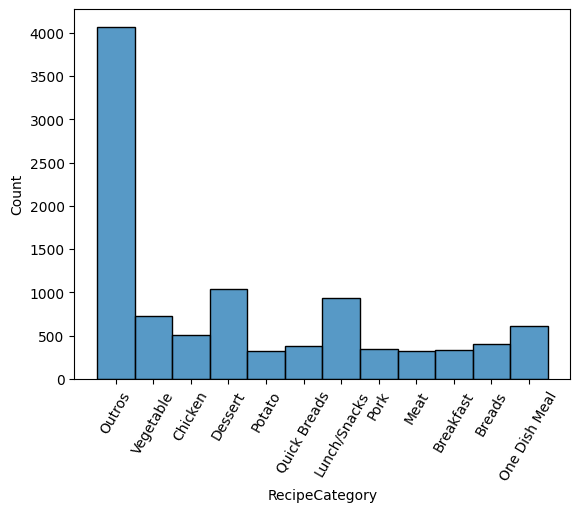

In [718]:
#histograma com as 12 categorias com mais receitas.

sns.histplot(filtro,  )
plt.xticks(rotation=60)
plt.show()

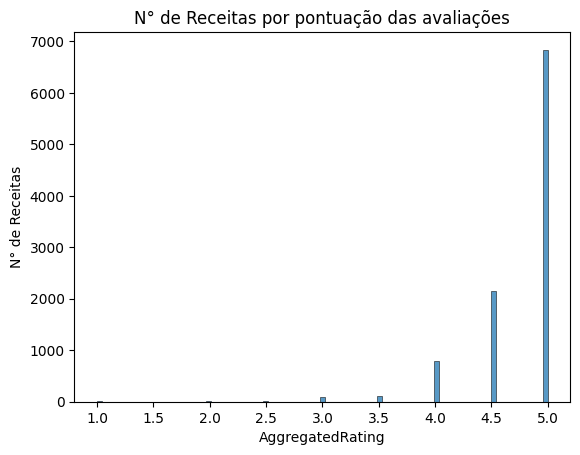

In [719]:
sns.histplot(recipes['AggregatedRating'])
plt.title('N° de Receitas por pontuação das avaliações')
#plt.savefig('Histograma_avaliação_receitas.png', format='png')
plt.ylabel('N° de Receitas');

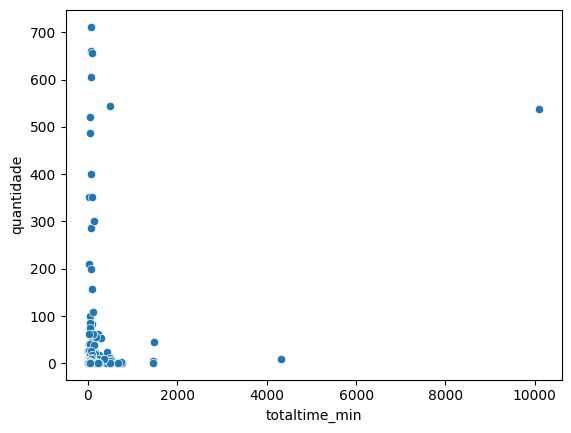

In [720]:
#Plot da distribuição da quantidade de receitas por tempo total

sns.scatterplot(x = recipes.totaltime_min, y = recipes.totaltime_min.value_counts())
plt.ylabel('quantidade')
plt.show()

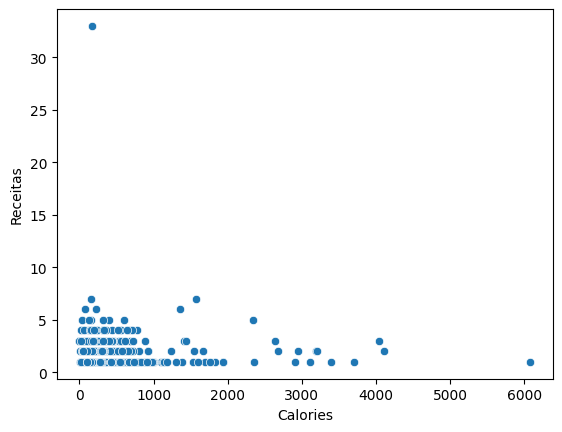

In [721]:
#Plot da distribuição das calorias

sns.scatterplot(x = recipes.Calories, y = recipes.Calories.value_counts())
plt.ylabel('Receitas')
plt.show()

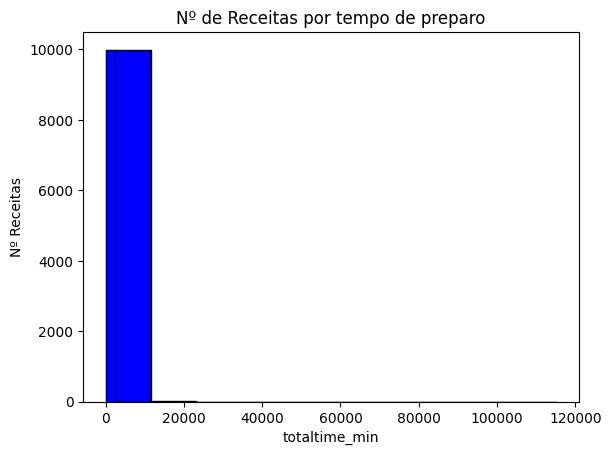

In [722]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

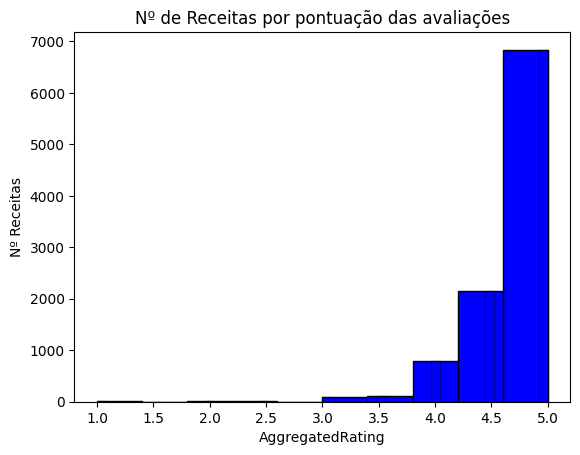

In [723]:

# matplotlib histogram

plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

**Resultados:**
- Existem muitas catégorias de receitas pequenas, que ao serem agrupadas, se tornam a maior catégoria presente no dataset, a catégoria que possuí mais entradas são *desert* seguida por *Lunch/snacks*;

- As notas atribuidas as nossas receitas não são confiaveis já que praticamente todas elas recebem 5 estrelas, fazendo com que haja pouca confiabilidade nessa váriavel;

- A maior distribuição de receitas se encontra no intevalo de 0m até 1900m, entretanto existem observasão com 10000m que equivalem a quase 7 dias de preparo;

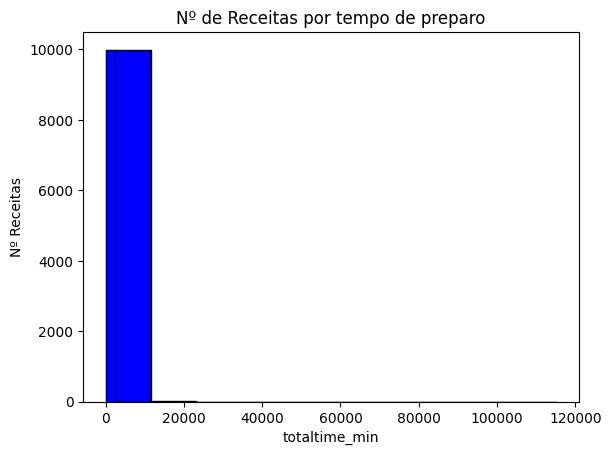

In [724]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

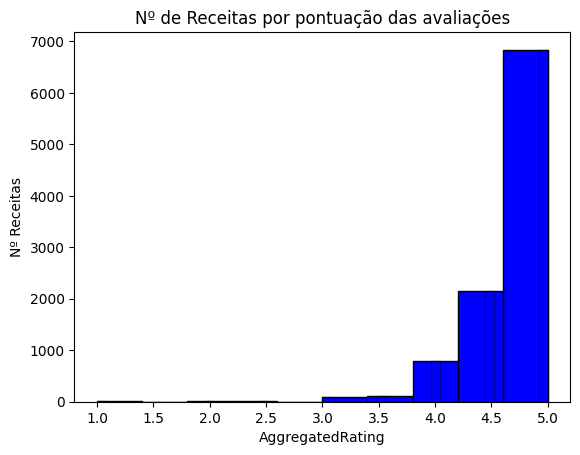

In [725]:

# matplotlib histogram
plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

### EDA 2

In [726]:
#dropando colunas adicionais:
recipes.drop(columns=['CookTime', 'PrepTime', 'TotalTime', 'reviews_in_dict', ], inplace=True)
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low


In [727]:
#explorando as colunas
recipes.describe().round(2)

,AggregatedRating,Calories,RecipeServings,totaltime_min
count,10000.00,10000.00,6147.00,10000.00
mean,4.77,493.86,7.62,126.62
std,0.41,742.02,7.51,1484.11
min,1.00,0.00,1.00,1.00
25%,4.50,177.78,4.00,27.00
50%,5.00,312.75,6.00,45.00
75%,5.00,514.92,8.00,72.00
max,5.00,13598.20,128.00,115230.00


In [728]:
#explorando as colunas
recipes.describe(include=np.object)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeYield,RecipeInstructions,hours,minutes
count,10000,10000,10000,10000,10000,10000,2999,10000,10000,10000
unique,9653,9861,173,8084,9539,9920,1472,9999,44,60
top,Banana Bread,Make and share this Banana Bread recipe from F...,Dessert,['< 60 Mins'],['1'],[],1 loaf,['Cook beans according to package directions.'...,0,30
freq,12,7,1037,75,32,20,119,2,6330,1056


**Resultados:**

### Tratamento de texto

#### Funções

In [729]:
#função para remover pontos e virgulas substituindo por espaços.

def clean_text(text: str) -> str:
    cleaned = text.lower()
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    return cleaned

In [730]:
#Função para remover stopwords em inlgês:

stopwords = nltk.corpus.stopwords.words('english')

def stopwords_remove(x):
    text_list = word_tokenize(x)
    filtered_sentence = []
    filtered_sentence = [w for w in text_list if not w.lower() in stopwords]
    for w in text_list:
        if w not in stopwords:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text

In [731]:
#Função para obter rootwords:

ps = PorterStemmer()

def stemmer_words(text):
    word_tokens = word_tokenize(text)
    stemmer_words = ' '.join(ps.stem(word) for word in word_tokens)
    return stemmer_words

In [732]:
def module(x):
    v = x
    normalized_v = normalize(v, axis=0).ravel()
    modulo = np.linalg.norm(normalized_v)
    return modulo

#### Abordagem


In [733]:
#função para aplicar a vetorização no dataset

def vectorize_txt(text):
    list_word = []
    list_word.append(text)
    matrix = vec.transform(list_word)
    return matrix.toarray()

In [734]:
coluna_texto = ['RecipeInstructions',
 'RecipeIngredientParts',
 'RecipeCategory',
 'Name',
 'Description',
 'Keywords']

In [735]:
def transform(x):
    
    y = str(x)+'_'+'clean'  
    recipes[y] = recipes[x].map(clean_text)
    recipes[y] = recipes[y].map(stopwords_remove)
    recipes[y] = recipes[y].map(stemmer_words)
    return recipes[y]
    

In [736]:
for i in coluna_texto:
    transform(i)


In [737]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeIngredientParts_clean'])
recipes['RecipeIngredientParts_vector'] = recipes['RecipeInstructions_clean'].map(vectorize_txt)
recipes['RecipeIngredientParts_module'] = recipes['RecipeIngredientParts_vector'].map(module)

In [738]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeCategory_clean'])
recipes['RecipeCategory_vector']= recipes['RecipeCategory_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [739]:
vec=TfidfVectorizer()
vec.fit(recipes['Name_clean'])
recipes['Name_vector']= recipes['Name_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [740]:
vec=TfidfVectorizer()
vec.fit(recipes['Description_clean'])
recipes['Description_vector']= recipes['Description_clean'].map(vectorize_txt)
recipes['Description_module'] = recipes['Description_vector'].map(module)

In [741]:
vec=TfidfVectorizer()
vec.fit(recipes['Keywords_clean'])
recipes['Keywords_vector']= recipes['Keywords_clean'].map(vectorize_txt)
recipes['Keywords_module'] = recipes['Keywords_vector'].map(module)

In [742]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[[0.10102373640425588, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[[0.0, 0.0, 0.3719720196342264, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25106071496769267, 0.0, 0.0, 0.0...",2.645751
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427

### Modelagem

In [743]:
encoder = LabelEncoder()
recipes['RecipeIngredientQuantities'] = encoder.fit_transform(recipes['RecipeIngredientQuantities'])

In [744]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...",8284,"['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...",3403,"['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[[0.10102373640425588, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...",77,"['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[[0.0, 0.0, 0.3719720196342264, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25106071496769267, 0.0, 0.0, 0.0...",2.645751
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...",4709,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...",8674,"['plain to

In [745]:
colunas = ['RecipeIngredientParts_module',
            'RecipeCategory_module',
            'Description_module',
            'Keywords_module',
            'Calories',
            'AggregatedRating',
            'totaltime_min',
            'RecipeIngredientQuantities']

scaler = MinMaxScaler()
scale = scaler.fit_transform(recipes[colunas])
recipes_scale = pd.DataFrame(scale, columns= [colunas])

In [746]:
recipes_scale

,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Calories,AggregatedRating,totaltime_min,RecipeIngredientQuantities
0,0.444444,0.565826,0.101413,0.503851,0.012568,0.875,0.012879,0.868526
1,0.824022,0.565826,0.000000,0.503851,0.081680,0.500,0.002291,0.356783
2,0.430331,0.000000,0.332379,0.383491,0.022878,0.875,0.000295,0.008073
3,0.728604,0.565826,0.083362,0.426058,0.039424,0.875,0.012662,0.493709
4,0.333333,0.000000,0.022953,0.466037,0.007619,0.875,0.000425,0.909415
...,...,...,...,...,...,...,...,...
9995,0.521157,0.000000,0.044318,0.233019,0.006501,1.000,0.000425,0.963095
9996,0.675863,0.000000,0.523795,0.426058,0.072083,1.000,0.001120,0.102642
9997,0.222222,0.000000,0.064383,0.337758,0.008435,1.000,0.000338,0.752149
9998,0.484322,0.000000,0.083362,0.233019,0.012413,0.875,0.000165,0.935940


In [747]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(recipes_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

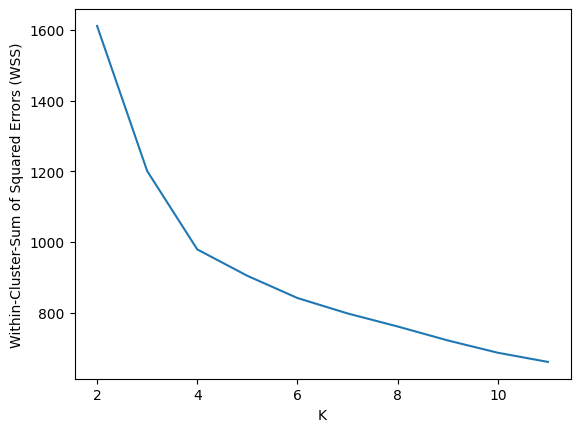

In [748]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [749]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(recipes_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(recipes_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.37625953045499033
Silhouette score for k(clusters) = 3 is 0.33302175319264954
Silhouette score for k(clusters) = 4 is 0.3355768152342472
Silhouette score for k(clusters) = 5 is 0.23871189463916376
Silhouette score for k(clusters) = 6 is 0.2430079186099864
Silhouette score for k(clusters) = 7 is 0.24606989297797197
Silhouette score for k(clusters) = 8 is 0.2181070663214388
Silhouette score for k(clusters) = 9 is 0.20339731574634373
Silhouette score for k(clusters) = 10 is 0.19261441164180812
Silhouette score for k(clusters) = 11 is 0.19804653555358154
Silhouette score for k(clusters) = 12 is 0.1878598637411377


In [750]:
kmeans  =  cluster.KMeans(n_clusters = 7, init = "k-means++") 
kmeans  =  kmeans.fit(recipes_scale[colunas])

In [751]:
recipes_final['Clusters'] = kmeans.labels_

In [752]:
recipes_final.head()

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
0,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy...",4
1,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In...",1
2,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ...",0
3,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi...",4
4,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver...",2


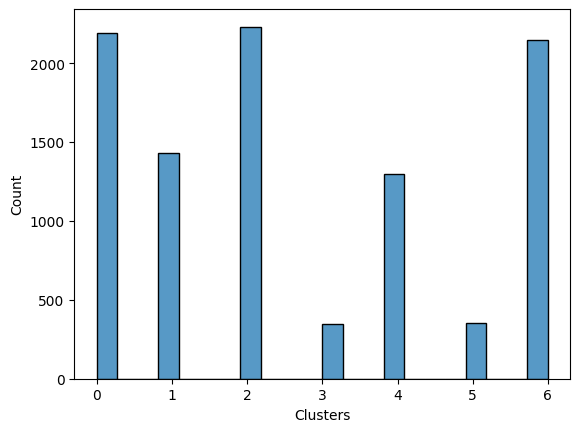

In [753]:
sns.histplot(data=recipes_final, x='Clusters');

In [754]:
filtro_0 = recipes_final[recipes_final.Clusters == 0]
filtro_1 = recipes_final[recipes_final.Clusters == 1]
filtro_2 = recipes_final[recipes_final.Clusters == 2]
filtro_3 = recipes_final[recipes_final.Clusters == 3]
filtro_4 = recipes_final[recipes_final.Clusters == 4]
filtro_5 = recipes_final[recipes_final.Clusters == 5]
filtro_6 = recipes_final[recipes_final.Clusters == 6]


In [755]:
filtro_0

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
2,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ...",0
13,Low-Fat Burgundy Beef & Vegetable Stew,PT2H14M,PT30M,PT2H44M,Make and share this Low-Fat Burgundy Beef & Ve...,Stew,"['Vegetable', 'Meat', 'Low Cholesterol', 'Heal...","['1 1/2', '1', '1', '1/2', '1/2', '1', '1/2', ...","['beef eye round', 'dried thyme leaves', 'salt...",4.5,280.1,6.0,NaN,"['Trim fat from beef, cut into 1-inch pieces.'...","{541614: {'Rating': 3, 'Review': 'This was an ...",0
22,Cheeseburger Casserole,PT25M,PT15M,PT40M,This is popular with the kids especially. My h...,Cheese,"['Meat', '< 60 Mins', 'Oven']","['1 1/2', '1 -2', '1/4', '1', '1/2', '1', '1/8...","['flour', 'ground beef', 'onion', 'tomato sauc...",4.5,543.5,6.0,NaN,['Combine ground beef and flour in skillet. Ad...,"{2372: {'Rating': 3, 'Review': 'Fast and easy....",0
39,Chicken-Fried Steak With Cracked Pepper Gravy,PT15M,PT1H20M,PT1H35M,Make and share this Chicken-Fried Steak With C...,Steak,"['Poultry', 'Meat', 'Weeknight', '< 4 Hours']","['1 1/2', '1 1/2', '2', '1', '2', '1/2', '1/2'...","['flour', 'salt', 'pepper', 'cayenne', 'eggs',...",5.0,1635.7,4.0,3 cups,['Prepare the flour spice by blending the flou...,"{369220: {'Rating': 5, 'Review': ""A very tasty...",0
48,Chocolate Tapioca Pudding,PT20M,PT30M,PT50M,Make and share this Chocolate Tapioca Pudding ...,Dessert,"['Free Of...', '< 60 Mins']","['1', '3', '1/8', '3 2/3', '1', '2', '2', '1']","['sugar', 'tapioca', 'salt', 'milk', 'egg', 'i...",5.0,230.5,8.0,NaN,"['Combine sugar, tapioca, and salt in a saucep...","{145361: {'Rating': 0, 'Review': ""It doesn't s...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,Kitty Cat Cookies,PT8M,PT15M,PT23M,I got this recipe from a friend. Simple and cu...,Dessert,"['Cookie & Brownie', 'Toddler Friendly', 'Kid ...","['1', '1/3', '2', '1']","['crunchy peanut butter', 'water', 'eggs']",4.0,192.5,20.0,40 cookies,"['Beat together peanut butter, eggs, and water...","{529570: {'Rating': 2, 'Review': 'Only because...",0
9979,Toasted Couscous with Almonds and Raisins,PT25M,PT5M,PT30M,Make and share this Toasted Couscous with Almo...,Fruit,"['Vegetable', 'Nuts', '< 30 Mins', 'Stove Top'...","['1 1/2', '1/4', '2', '2', '1/8', '1/8', '1', ...","['couscous', 'celery', 'salt', 'pepper', 'grou...",5.0,170.2,8.0,NaN,['Heat a large nonstick skillet over moderate ...,"{1279146: {'Rating': 5, 'Review': 'A very enjo...",0
9980,Tangy Flank Steak,PT7H,PT15M,PT7H15M,Make and share this Tangy Flank Steak recipe f...,Meat,"['Very Low Carbs', 'High Protein', 'High In......","['1 1/2', '2', '1', '4', '1/3', '2', '1 1/4', ...","['beef flank steak', 'onion', 'green chilies',...",5.0,286.5,6.0,NaN,['Cut flank steak in half if needed to fit in ...,"{473864: {'Rating': 5, 'Review': 'This turned ...",0
9989,Christmas Dried Fruitcake,PT1H,PT10M,PT1H10M,Make and share this Christmas Dried Fruitcake ...,Dessert,"['Fruit', 'Finnish', 'Scandinavian', 'European...","['1', '1', '4', '2', '2', '1/4', '2', '1', '1']","['butter', 'margarine', 'sugar', 'eggs', 'flou...",5.0,4004.8,NaN,1 cake,['Dust the fruit with the 1 Tablespoon of flou...,"{83320: {'Rating': 5, 'Review': 'i can honestl...",0


In [756]:
filtro_0.RecipeCategory.value_counts()

Dessert      396
Vegetable    276
Meat         149
Chicken      113
Breads       113
            ... 
Chutneys       1
Pheasant       1
Winter         1
Colombian      1
Nuts           1
Name: RecipeCategory, Length: 91, dtype: int64

In [757]:
filtro_0.shape

(2192, 16)

In [758]:
filtro_1

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
1,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In...",1
15,Black Coffee Barbecue Sauce,PT20M,PT10M,PT30M,It's great to know folks like this sauce so mu...,Lactose Free,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1/2', '1', '1/4', '3/4', '1', '2', '2', '2',...","['brewed coffee', 'ketchup', 'red wine vinegar...",5.0,772.0,NaN,1 1/2 cups,['Combine all ingredients in a saucepan and si...,"{28540: {'Rating': 4, 'Review': 'This was an e...",1
34,Anzac Biscuits,PT15M,PT10M,PT25M,These biscuits (cookies in America) are called...,< 30 Mins,['Oven'],"['1', '1', '1/2', '3/4', '1', '125', '1/2', '1']","['rolled oats', 'plain flour', 'sugar', 'golde...",5.0,199.4,12.0,12-24 cookies,"['Mix oats, flour, sugar and coconut together....","{12870: {'Rating': 5, 'Review': 'Made this for...",1
35,Coconut Chicken Bites,PT25M,PT40M,PT1H5M,Make and share this Coconut Chicken Bites reci...,Lunch/Snacks,"['Chicken Breast', 'Chicken', 'Poultry', 'Coco...","['1', '1', '1/2', '1/2', '1/4', '1/4', '1', '1...","['chicken breast', 'coconut', 'flour', 'salt',...",5.0,1094.1,2.0,NaN,"['Heat oven to 400°F.', 'Mix flour, coconut, s...","{19790: {'Rating': 5, 'Review': ""Anyone who ha...",1
37,Cola Fruit and Date Loaf,PT1H,PT50M,PT1H50M,--Adopted Recipe-- The original submitter say...,Quick Breads,"['Breads', 'Fruit', 'Low Cholesterol', 'Health...","['1', '1 1/4', '1', '2', '2', '1', '1', '1', '...","['dates', 'brown sugar', 'flour', 'baking soda...",5.0,267.0,12.0,NaN,"['Preheat oven to 350 Fahrenheit.', 'Generousl...","{360173: {'Rating': 5, 'Review': 'The 5 stars ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,Herb Loves Her Herb Bread,PT3H,PT5M,PT3H5M,Make and share this Herb Loves Her Herb Bread ...,Yeast Breads,"['Breads', 'Grains', 'Weeknight', 'Bread Machi...","['1 1/4', '1', '3/4', '1', '3 1/4', '1 1/2', '...","['water', 'butter', 'salt', 'sugar', 'white fl...",5.0,1723.2,NaN,1 loaf,"[""Add ingredients according to manufacturer's ...","{67154: {'Rating': 5, 'Review': ""Mmmmm. This i...",1
9986,Roast Beef with Peppercorn-Herb Crust,PT3H,PT7H,PT10H,Make and share this Roast Beef with Peppercorn...,Roast Beef,"['Meat', 'Winter', 'Weeknight', 'Roast', 'Oven...","['1', '9', '1', '1', '1/2', '1/2', '2', '2', '...","['boneless bottom round roast', 'garlic', 'kos...",4.5,635.3,NaN,NaN,"['Dry the meat with paper toweling.', 'Make 6 ...","{158749: {'Rating': 5, 'Review': 'Great recipe...",1
9987,Canary Island Style Pollo En Adobo,PT20M,PT10M,PT30M,One of the most popular ways to serve chicken ...,Chicken Breast,"['Whole Chicken', 'Chicken', 'Poultry', 'Meat'...","['1', '3 -4', '1', '1/2', '1/4', '1/4', '2 -3']","['broiler-fryer chicken', 'garlic cloves', 'pa...",5.0,624.9,4.0,NaN,"['Using a mortar and pestle, mash garlic and s...","{48041: {'Rating': 5, 'Review': ""This was awes...",1
9990,Red Onion Jam,PT30M,PT15M,PT45M,Make and share this Red Onion Jam recipe from ...,Low Protein,"['Low Cholesterol', 'Healthy', '< 60 Mins', 'S...","['1', '8', '1/4', '2', '2', '6', '1', '1/2', '...","['olive oil', 'red onions', 'brown sugar', 'gi...",5.0,143.0,NaN,2 Cups,['Heat oil in dutch oven over medium-high heat...,"{171675: {'Rating': 5, 'Review': 'Great recipe...",1


In [759]:
filtro_1.RecipeCategory.value_counts()

Lunch/Snacks         464
Quick Breads         190
Drop Cookies         150
Bar Cookie           141
Yeast Breads         104
Chicken Breast        72
Very Low Carbs        32
< 60 Mins             26
White Rice            24
Lamb/Sheep            24
Low Protein           22
< 30 Mins             20
Savory Pies           18
Whole Chicken         15
< 15 Mins             15
Frozen Desserts       14
Low Cholesterol       13
Kid Friendly          11
Roast Beef            10
Black Beans            7
High Protein           7
Pasta Shells           6
Whole Turkey           6
Sourdough Breads       6
Lactose Free           6
Tex Mex                5
Soy/Tofu               4
Salad Dressings        4
Broil/Grill            3
Whole Duck             3
Household Cleaner      3
Clear Soup             2
Punch Beverage         2
Chicken Livers         2
Summer Dip             1
Costa Rican            1
Name: RecipeCategory, dtype: int64

In [760]:
filtro_1.shape

(1433, 16)

In [761]:
filtro_2

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
4,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver...",2
6,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,Make and share this Buttermilk Pie With Ginger...,Pie,"['Dessert', 'Healthy', 'Weeknight', 'Oven', '<...","['3/4', '1', '1', '2', '3', '1/4', '1', '1/2',...","['sugar', 'margarine', 'egg', 'flour', 'salt',...",4.0,228.0,8.0,NaN,"['Preheat oven to 350°F.', 'Make pie crust, us...","{66634: {'Rating': 5, 'Review': ""This was my f...",2
7,Butter Pecan Cookies,PT9M,PT55M,PT1H4M,Make and share this Butter Pecan Cookies recip...,Dessert,"['Cookie & Brownie', 'Fruit', 'Nuts', 'Weeknig...","['3/4', '1/2', '1', '1', '1', '2', '1']","['butter', 'brown sugar', 'granulated sugar', ...",4.0,69.0,NaN,84 cookies,"['Preheat oven to 350 degrees.', 'Cream butter...","{240675: {'Rating': 4, 'Review': 'These came o...",2
9,Biscotti Di Prato,PT50M,PT20M,PT1H10M,Make and share this Biscotti Di Prato recipe f...,Dessert,"['Cookie & Brownie', 'European', 'Weeknight', ...","['3 3/4', '2', '1', '1/4', '4', '1', '1/2', '1...","['flour', 'sugar', 'baking powder', 'salt', 'e...",4.5,89.4,NaN,56 biscotti,"['EGG WASH 1 Egg, large 1 tsp Water In the bow...","{139986: {'Rating': 5, 'Review': 'This recipe ...",2
10,Carrot Cake,PT50M,PT45M,PT1H35M,This is one of the few recipes my husband ever...,Dessert,"['Vegetable', 'Weeknight', 'Oven', '< 4 Hours']","['3', '4', '1 1/4', '2', '2', '2', '2', '1', '...","['carrots', 'eggs', 'white sugar', 'all-purpos...",5.0,522.6,12.0,1 bundt,"['Beat together the eggs, oil, and white sugar...","{74639: {'Rating': 3, 'Review': ""I made this a...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,Tomato and Basil Bruschetta,PT35M,PT10M,PT45M,"My first culinary ""success."" This recipe came ...",Vegetable,"['European', 'Low Cholesterol', '< 60 Mins', '...","['6', '2', '2', '3', '2 1/4', '2', '1/2', '1/4...","['roma tomatoes', 'garlic', 'garlic', 'olive o...",5.0,232.8,4.0,NaN,"['Whisk together chopped garlic, vinegar, salt...","{30171: {'Rating': 5, 'Review': 'Nice and easy...",2
9995,Chocolate Covered Cherries,PT20M,PT30M,PT50M,Make and share this Chocolate Covered Cherries...,Candy,"['Dessert', 'Fruit', '< 60 Mins']","['60', '3', '3', '1/4', '2', '1 1/2']","['maraschino cherries', 'butter', 'margarine',...",5.0,88.4,NaN,60 candies,['Drain cherries well; let stand on paper towe...,"{77656: {'Rating': 0, 'Review': 'I tried this ...",2
9997,Roasted Butternut Squash and Shallots,PT20M,PT20M,PT40M,Make and share this Roasted Butternut Squash a...,Vegetable,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['3', '1', '2 1/2', '1', '1/2', '8']","['brown sugar', 'olive oil', 'salt', 'black pe...",5.0,114.7,4.0,NaN,"['Preheat oven to 475.', 'Combine ingredients ...","{129024: {'Rating': 5, 'Review': 'Made this se...",2
9998,Family Style - Deep Dish Omelette,PT10M,PT10M,PT20M,Make and share this Family Style - Deep Dish O...,Breakfast,"['Brunch', '< 30 Mins', 'Easy']","['6', '1', '1/2', '1/8', '1', '1', '1/2']","['eggs', 'cheddar cheese', 'salt', 'cracked bl...",4.5,168.8,6.0,NaN,"['In large bowl, whisk together eggs, cheese,s...","{59405: {'Rating': 5, 'Review': ""I Didn't chan...",2


In [762]:
filtro_2.shape

(2231, 16)

In [763]:
filtro_2.RecipeCategory.value_counts()

Dessert       304
Vegetable     260
Chicken       223
Potato        179
Pork          160
             ... 
Hungarian       1
Meatloaf        1
Indonesian      1
Microwave       1
Christmas       1
Name: RecipeCategory, Length: 99, dtype: int64

In [764]:
filtro_3

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
168,Spaghetti Pie,PT20M,PT5M,PT25M,Make and share this Spaghetti Pie recipe from ...,One Dish Meal,"['Spaghetti', 'European', '< 30 Mins', 'Oven']","['4', '1', '1/4', '8', '1/2', '1/2', '1/2', '1...","['spaghetti', 'egg', 'nonfat parmesan cheese',...",5.0,192.8,6.0,NaN,['Cook spaghetti for 10 to 12 minutes or until...,"{73113: {'Rating': 5, 'Review': 'Good, good, g...",3
179,Ground Beef Stuffed Green Bell Peppers With Ch...,PT35M,PT15M,PT50M,We had these not too long ago and we both deci...,Long Grain Rice,"['Rice', 'Cheese', 'Vegetable', 'Meat', '< 60 ...","['6', '1', '1/2', '1', '1/2', '1', '1', '1', '1']","['green peppers', 'beef', 'onion', 'tomatoes',...",5.0,1389.5,3.0,6 peppers,['Cut off the tops of green peppers; discard s...,"{12029: {'Rating': 4, 'Review': 'These were qu...",3
301,Chicken Drumsticks in Ginger Wine,PT1H,PT5M,PT1H5M,This is an adopted recipe of mine. I have adde...,Chicken Thigh & Leg,"['Chicken', 'Poultry', 'Meat', '< 4 Hours']","['8', '2', '2', '4', '2', '1', '3', '2', '2', ...","['chicken drumsticks', 'black soy sauce', 'gin...",5.0,320.4,4.0,NaN,['Heat oil in a pan and fry chicken until brow...,"{1164963: {'Rating': 5, 'Review': 'We had a li...",3
585,Basmati Rice Seasoned with Garam Masala,PT25M,PT5M,PT30M,Make and share this Basmati Rice Seasoned with...,Long Grain Rice,"['Rice', 'Asian', 'Indian', 'Potluck', 'Weekni...","['2', '4', '1', '1', '1', '1', '4']","['basmati rice', 'butter', 'onion', 'garlic', ...",5.0,304.1,6.0,NaN,"['Preheat oven to 350°F.', 'In a medium stove-...","{164185: {'Rating': 5, 'Review': ""Excellent ri...",3
639,Baked Stuffed Bell Peppers,PT2H,PT15M,PT2H15M,There are so many recipes for Baked Stuffed Pe...,One Dish Meal,"['Rice', 'Vegetable', 'Meat', 'Winter', 'Oven'...","['4', '1', '1', '1', '1', '2', '1', '1', '1/8']","['ground beef', 'cooked rice', 'pepper', 'onio...",4.5,386.7,NaN,NaN,"['Preheat your oven to 350°F.', 'In a large bo...","{154242: {'Rating': 5, 'Review': ""Delicious. ...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,Meaty Breakfast Casserole,PT55M,PT20M,PT1H15M,We make this the night before and breakfast fo...,One Dish Meal,"['Breakfast', 'Pork', 'Cheese', 'Meat', 'Weekn...","['7', '8', '6', '3', '1/2', '1/4', '1', '1/2',...","['cheddar cheese', 'eggs', 'milk', 'salt', 'pe...",5.0,554.7,6.0,NaN,"['Trim crusts from bread, cut into cubes, cove...","{33478: {'Rating': 4, 'Review': ""My whole fami...",3
9897,Seafood Salad,PT10M,PT20M,PT30M,"I enjoy seafood salad, but could not get it to...",One Dish Meal,"['Lobster', 'Crab', '< 30 Mins', 'Easy']","['8', '1 -2', '1', '1', '1/2', '1/2', '3', '2'...","['elbow macaroni', 'lobster', 'celery', 'cucum...",5.0,194.5,NaN,NaN,['Mix all ingredients together in a large bowl...,"{54945: {'Rating': 5, 'Review': ""This is a del...",3
9910,Sweet Potato Bake,PT45M,PT15M,PT1H,This is our favorite sweet potato casserole. W...,Yam/Sweet Potato,"['Potato', 'Vegetable', 'Low Protein', 'Kid Fr...","['3', '1', '1/2', '3', '1', '1/2', '1/2', '3/4...","['mashed sweet potatoes', 'sugar', 'milk', 'bu...",5.0,436.4,8.0,NaN,"['Beat sweet potatoes, sugar, milk, butter, eg...","{33767: {'Rating': 0, 'Review': ""This recipe i...",3
9913,Crock Pot Sweet and Sour Roast,PT8H,PT10M,PT8H10M,Make and share this Crock Pot Sweet and Sour R...,One Dish Meal,"['Roast Beef', 'Meat', 'Kid Friendly', 'Free O...","['4', '1', '1', '1', '1', '1/3', '2', '2', '1/2']","['potatoes', 'boneless beef chuck roast', 'oni...",5.0,208.7,6.0,NaN,"['Place potatoes in crock pot.', 'Cut roast in...","{30553: {'Rating': 5, 'Review': 'A delicious r...",3


In [765]:
filtro_3.shape

(345, 16)

In [766]:
filtro_3.RecipeCategory.value_counts()

One Dish Meal          288
Yam/Sweet Potato        25
Chicken Thigh & Leg     11
Long Grain Rice         10
Short Grain Rice         6
Beef Organ Meats         4
Medium Grain Rice        1
Name: RecipeCategory, dtype: int64

In [767]:
filtro_4

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
0,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy...",4
3,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi...",4
8,Chicken Breasts Lombardi,PT30M,PT45M,PT1H15M,Make and share this Chicken Breasts Lombardi r...,Chicken Breast,"['Chicken', 'Poultry', 'Meat', 'European', 'Ve...","['2', '2', '12', '1/2', '1/3', '3/4', '1/2', '...","['fresh mushrooms', 'butter', 'boneless skinle...",5.0,627.7,6.0,NaN,['Cook mushrooms in 2 tbsp butter in a large ...,"{17145: {'Rating': 4, 'Review': ""I give this r...",4
23,Butterflied Lamb with Garlic Butter,PT4H15M,PT45M,PT5H,Make and share this Butterflied Lamb with Garl...,Lamb/Sheep,"['Meat', 'High Protein', 'High In...', 'Weekni...","['2', '1/4', '1', '1', '4', '1', '90', '1/4', ...","['lamb', 'parsley', 'fresh thyme', 'lemon, rin...",5.0,1194.6,4.0,NaN,"['Open lamb out flat, place the fat-side down ...","{244479: {'Rating': 5, 'Review': ""Wow, talk ab...",4
24,Chicken Breasts Saltimbocca,PT6H,PT1H,PT7H,Make and share this Chicken Breasts Saltimbocc...,Chicken Breast,"['Chicken', 'Poultry', 'Meat', 'European', 'We...","['6', '6', '6', '1/4', '1/4', '1', '1/2', '1/4...","['boneless skinless chicken breast halves', 'h...",5.0,511.9,6.0,NaN,['Pound chicken breast halves until thin betwe...,"{15671: {'Rating': 5, 'Review': 'Delicious! Mo...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,Oatmeal Bread,PT40M,PT2H,PT2H40M,I have been making this recipe since my daught...,Yeast Breads,"['Breads', 'Grains', 'Healthy', 'Kid Friendly'...","['2', '1/2', '1 1/4', '1', '1/2', '1/3', '1', ...","['quick-rising yeast', 'water', 'boiling water...",5.0,208.2,20.0,2 loaves,"['Soften yeast in the warm water.', 'Combine t...","{46820: {'Rating': 5, 'Review': ""MG... this de...",4
9957,Halloween Bones,PT1H30M,PT25M,PT1H55M,Make and share this Halloween Bones recipe fro...,Low Cholesterol,"['Healthy', 'Halloween', 'Weeknight', 'Oven', ...","['2', '4']",['white sugar'],4.5,39.4,NaN,12 bones,"['Preheat oven to 250 degrees F.', 'Beat the e...","{45916: {'Rating': 5, 'Review': 'I know that i...",4
9967,French Fried Onions,PT30M,PT15M,PT45M,A homemade alternative to the Durkee brand. I ...,Lunch/Snacks,"['Vegetable', 'Low Cholesterol', 'Healthy', 'K...","['3', '2', '2']","['onions', 'milk', 'all-purpose flour', 'salt']",5.0,280.5,NaN,5-6 cups,"['Soak the onions in the milk for 5 minutes.',...","{33308: {'Rating': 5, 'Review': ""I was caught ...",4
9978,Vegetarian Fresh Spring Rolls,PT10M,PT45M,PT55M,A cleansing mouthful of fresh vegetables that ...,Lunch/Snacks,"['Vegetable', 'Potluck', '< 60 Mins']","['2', '2 -3', '1/2', '1/3', '1', '1/4', '1/4',...","['carrots', 'green onions', 'napa cabbage', 'o...",5.0,175.6,4.0,NaN,"['In a large bowl, combine the carrots, green ...","{39374: {'Rating': 5, 'Review': ""I added bean ...",4


In [768]:
filtro_4.shape

(1300, 16)

In [769]:
filtro_4.RecipeCategory.value_counts()

Lunch/Snacks         466
Quick Breads         194
Chicken Breast       117
Bar Cookie            91
Drop Cookies          79
Yeast Breads          68
Lamb/Sheep            35
Very Low Carbs        26
< 60 Mins             22
< 30 Mins             20
Savory Pies           20
Low Protein           16
Frozen Desserts       14
Roast Beef            14
Punch Beverage        13
Black Beans           13
Sourdough Breads      12
White Rice             9
< 15 Mins              9
Low Cholesterol        7
Whole Chicken          6
High Protein           6
Kid Friendly           6
Soy/Tofu               5
Salad Dressings        4
Orange Roughy          3
Tex Mex                3
Clear Soup             3
Pasta Shells           3
Collard Greens         3
Brown Rice             2
Broil/Grill            2
Lactose Free           2
Turkey Breasts         2
Native American        1
Duck Breasts           1
Peanut Butter          1
Wild Game              1
Household Cleaner      1
Name: RecipeCategory, dty

In [770]:
filtro_5

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
395,Dill-Lemon Rice,PT25M,PT5M,PT30M,Make and share this Dill-Lemon Rice recipe fro...,Long Grain Rice,"['Rice', 'Low Protein', 'Low Cholesterol', 'He...","['1', '1 1/2', '1', '1', '3', '2', '1']","['long grain rice', 'dill weed', 'salt', 'inst...",5.0,194.8,NaN,NaN,"['Combine rice, lemon peel, dill weed, salt an...","{88610: {'Rating': 5, 'Review': ""This was abso...",5
513,Sweet Potato & Pear Soup,PT30M,PT10M,PT40M,Make and share this Sweet Potato & Pear Soup r...,Yam/Sweet Potato,"['Potato', 'Pears', 'Fruit', 'Vegetable', 'Low...","['1', '1', '1/4', '1/4', '3', '2', '1/2', '1',...","['butter', 'onion', 'carrot', 'celery', 'sweet...",5.0,123.3,8.0,NaN,"['In a pot, heat butter on medium heat. Add on...","{88918: {'Rating': 5, 'Review': ""I made this r...",5
622,Rice Pilaf,PT20M,PT10M,PT30M,Make and share this Rice Pilaf recipe from Foo...,Long Grain Rice,"['Rice', 'Vegetable', 'Vegan', 'Microwave', '<...","['1/2', '2', '1', '2/3', '1/3', '1/4', '1/4', ...","['fresh mushrooms', 'green onions', 'butter', ...",4.0,175.7,2.0,NaN,"['In a 1-quart casserole microwave mushrooms, ...","{6039: {'Rating': 3, 'Review': ""Nice enough, b...",5
772,Mexican Fiesta Casserole,PT35M,PT15M,PT50M,I adopted this recipe in February 2005. While...,One Dish Meal,"['Vegetable', 'Meat', 'Mexican', '< 60 Mins', ...","['1', '1', '1', '1', '2/3', '1/4', '2', '1/2',...","['lean ground beef', 'chili powder', 'cheddar ...",4.0,511.1,6.0,NaN,"['Preheat the oven to 375F.', 'Cook the ground...","{11385: {'Rating': 5, 'Review': ""Very good. Si...",5
836,Chicken Stir-Fry,PT15M,PT10M,PT25M,Make and share this Chicken Stir-Fry recipe fr...,One Dish Meal,"['Chicken Breast', 'Chicken', 'Poultry', 'Meat...","['1', '1', '1', '2', '1', '1', '2']","['boneless skinless chicken breast', 'soy sauc...",4.5,665.6,4.0,NaN,['Cook cut cup chicken breast strips in salad ...,"{9972: {'Rating': 5, 'Review': 'Very good, and...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,Chive-Ham Brunch Bake,PT30M,PT20M,PT50M,Make and share this Chive-Ham Brunch Bake reci...,One Dish Meal,"['Breakfast', 'Lunch/Snacks', 'Ham', 'Pork', '...","['1/2', '1', '5', '1', '2', '1/2', '1', '2', '...","['onion', 'butter', 'cooked ham', 'tomatoes', ...",4.5,271.3,8.0,NaN,"['In a skillet, saute onion in butter until te...","{625758: {'Rating': 5, 'Review': 'My DD made t...",5
9896,Taco-Stuffed Pasta Shells,PT25M,PT7M,PT32M,Make and share this Taco-Stuffed Pasta Shells ...,One Dish Meal,"['Pasta Shells', '< 60 Mins']","['1 1/4', '3', '1', '18', '2', '1', '4', '1']","['ground beef', 'cream cheese', 'chili powder'...",5.0,387.9,6.0,NaN,"['Brown ground beef; drain if necessary.', 'Ad...","{215530: {'Rating': 5, 'Review': ""I actually k...",5
9912,Apple Wild Rice Breakfast,PT6M,PT5M,PT11M,"A great breakfast, especially if camping. Make...",One Dish Meal,"['Breakfast', 'Rice', 'Apple', 'Fruit', 'Healt...","['1', '1', '1', '2', '1/4', '1/4']","['apple', 'butter', 'wild rice', 'brown sugar'...",4.5,425.2,2.0,NaN,"['Core apple and cut into bit size pieces.', '...","{286813: {'Rating': 0, 'Review': ""This was sup...",5
9936,Dinner in a Pumpkin,PT3H,PT20M,PT3H20M,Make and share this Dinner in a Pumpkin recipe...,One Dish Meal,"['Vegetable', 'Meat', 'Kid Friendly', 'Hallowe...","['1', '1 1/2', '1', '1', '1 1/2', '1 1/2', '1 ...","['pumpkin', 'lean ground beef', 'onion', 'garl...",4.5,280.4,NaN,NaN,['Preheat oven to 350 degrees F (175 degrees C...,"{216207: {'Rating': 4, 'Review': 'This sounds ...",5


In [771]:
filtro_5.shape

(352, 16)

In [772]:
filtro_5.RecipeCategory.value_counts()

One Dish Meal          328
Long Grain Rice          7
Chicken Thigh & Leg      6
Yam/Sweet Potato         4
Beef Organ Meats         4
Short Grain Rice         3
Name: RecipeCategory, dtype: int64

In [773]:
filtro_6

,Name,CookTime,PrepTime,TotalTime,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict,Clusters
5,Warm Chicken A La King,PT3M,PT35M,PT38M,I copied this one out of a friend's book so ma...,Chicken,"['Poultry', 'Meat', '< 60 Mins']","['12', '2', '3', '450', '1', '2', '1/4', '1', ...","['chicken', 'butter', 'flour', 'milk', 'celery...",5.0,895.5,2.0,NaN,"['Melt 1 1/2 ozs butter, add the flour and coo...","{14: {'Rating': 5, 'Review': 'An excellent dis...",6
12,Buttermilk Pie,PT1H,PT20M,PT1H20M,This recipe was originally noted by my wife on...,Pie,"['Dessert', 'Oven', '< 4 Hours', 'Easy']","['1/2', '1 1/2', '3', '3', '1', '1', '1', '1']","['butter', 'margarine', 'sugar', 'flour', 'egg...",5.0,395.9,8.0,NaN,"['Preheat oven to 400°F.', 'Beat the butter an...","{25409: {'Rating': 5, 'Review': 'Okay. This is...",6
14,Lou's Fabulous Bruschetta,PT10M,PT30M,PT40M,Make and share this Lou's Fabulous Bruschetta ...,Vegetable,"['European', 'Low Cholesterol', 'Healthy', 'Sp...","['1', '3/4', '4 -5', '1 -2', '4 -5']","['French baguette', 'butter', 'garlic powder',...",5.0,221.5,8.0,NaN,"['Cut baguette into slices.', 'Butter and then...","{58620: {'Rating': 5, 'Review': 'Made this dis...",6
16,Alfredo Sauce,PT10M,PT5M,PT15M,This is my son's favorite meal. I make it with...,Sauces,"['European', 'Very Low Carbs', 'High In...', '...","['1/4', '1', '3/4', '1/4']","['sweet butter', 'heavy cream', 'parmesan chee...",5.0,489.9,4.0,NaN,['Place butter in microwave safe pot and heat ...,"{59765: {'Rating': 5, 'Review': 'excellant sta...",6
17,Brazilian Empadinhas,PT2H37M,PT1H,PT3H37M,The empanadas in Brazil are different from tho...,Brazilian,"['South American', 'Weeknight', 'Oven', '< 4 H...","['2 1/2', '1/2', '1/4', '1', '1', '3', '1', '1...","['butter', 'flour', 'salt', 'margarine', 'milk...",3.5,329.7,8.0,NaN,"['DOUGH Cut butter into salt and flour.', 'Sti...","{242431: {'Rating': 5, 'Review': 'Great taste ...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,Balsamic-And Dijon-Glazed Ham With Roasted Pea...,PT2H30M,PT25M,PT2H55M,Make and share this Balsamic-And Dijon-Glazed ...,Ham,"['Pork', 'Meat', 'Spring', 'Winter', 'Christma...","['2', '1', '5', '3', '1/4', '1', '1/4', '8 -10']","['brown sugar', 'Dijon mustard', 'butter', 'sa...",5.0,937.7,12.0,NaN,['Cook onions in large pot of boiling salted w...,"{32873: {'Rating': 5, 'Review': 'This recipe i...",6
9982,Tangerine Tea,PT20M,PT10M,PT30M,Make and share this Tangerine Tea recipe from ...,Beverages,['< 30 Mins'],"['2', '1 1/2', '1/4', '1/4', '1/8', '2']","['water', 'tangerine juice', 'sugar', 'ground ...",5.0,49.0,4.0,NaN,"['Heat water to boiling in large saucepan.', '...","{31571: {'Rating': 5, 'Review': 'I had a tirin...",6
9988,Oven Baked Fish,PT15M,PT10M,PT25M,Make and share this Oven Baked Fish recipe fro...,Healthy,"['Kid Friendly', '< 30 Mins', 'Oven', 'Easy']","['1/3', '1/4', '1', '2', '2/3', '1', '1/8', '1']","['all-purpose flour', 'pepper', 'egg', 'water'...",5.0,162.7,4.0,NaN,"['Preheat oven to 425°F.', 'Combine flour and ...","{38717: {'Rating': 5, 'Review': ""This recipe t...",6
9992,Just Like the Restaurant.... Crab Rangoon,PT30M,PT15M,PT45M,Make and share this Just Like the Restaurant.....,Crab,"['Chinese', 'Asian', '< 60 Mins', 'Deep Fried'...","['12', '1/2', '1/4', '2', '3/4 - 1', '50']","['cream cheese', 'soy sauce', 'garlic powder',...",5.0,46.9,NaN,50 Appetizers,"['Cream the cheese, soy sauce, garlic powder, ...","{106245: {'Rating': 5, 'Review': ""Anyone passi...",6


In [774]:
filtro_6.shape

(2147, 16)

In [775]:
filtro_6.RecipeCategory.value_counts()

Dessert         337
Vegetable       194
Chicken         174
Breads          162
Breakfast       107
               ... 
Stocks            1
Perch             1
Berries           1
Greek             1
Thanksgiving      1
Name: RecipeCategory, Length: 96, dtype: int64